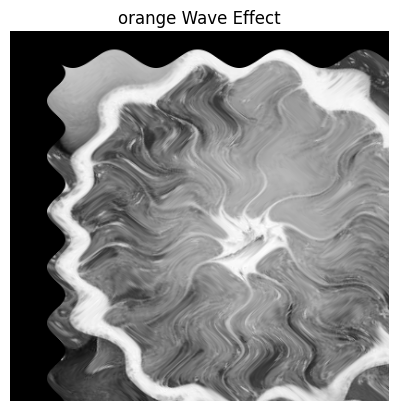

In [1]:
#bai 1

import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('orange.jpg').convert('L')  
data = np.array(img)

shifted = nd.shift(data, shift=(30, 50))  

rows, cols = shifted.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
wave_x = x + 10 * np.sin(2 * np.pi * y / 60)  
wave_y = y + 10 * np.sin(2 * np.pi * x / 90)  

coords = [wave_y, wave_x]

wave_image = nd.map_coordinates(shifted, coords, order=1, mode='reflect')

plt.imshow(wave_image, cmap='gray')
plt.axis('off')
plt.title('orange Wave Effect')
plt.show()

output = Image.fromarray(wave_image.astype(np.uint8))
output.save('orange_wave.jpg')


In [ ]:
#bai 2 

from PIL import Image, ImageOps
import numpy as np

# Hàm áp dụng gradient màu
def apply_gradient(image, color_start, color_end):
    image = image.convert("L")  # grayscale
    img_np = np.array(image) / 255.0  # normalize to 0-1

    # Tạo gradient màu (interpolation)
    r = (1 - img_np) * color_start[0] + img_np * color_end[0]
    g = (1 - img_np) * color_start[1] + img_np * color_end[1]
    b = (1 - img_np) * color_start[2] + img_np * color_end[2]

    gradient = np.stack([r, g, b], axis=2).astype(np.uint8)
    return Image.fromarray(gradient)

# Đọc ảnh đã tách nền (transparent background)
papaya = Image.open('papaya.jpg').convert("RGBA")
watermelon = Image.open('watermelon.jpg').convert("RGBA")

# Lấy RGB và alpha riêng biệt
papaya_rgb = papaya.convert("RGB")
watermelon_rgb = watermelon.convert("RGB")
papaya_alpha = papaya.getchannel("A")
watermelon_alpha = watermelon.getchannel("A")

# Áp dụng autocontrast lên ảnh RGB
papaya_rgb = ImageOps.autocontrast(papaya_rgb)
watermelon_rgb = ImageOps.autocontrast(watermelon_rgb)

# Áp dụng gradient màu:
# - đỏ -> xanh lá cho đu đủ
# - vàng -> tím cho dưa hấu
papaya_colored = apply_gradient(papaya_rgb, (255, 0, 0), (0, 255, 0))
watermelon_colored = apply_gradient(watermelon_rgb, (255, 255, 0), (128, 0, 128))

# Gắn lại alpha channel
papaya_colored.putalpha(papaya_alpha)
watermelon_colored.putalpha(watermelon_alpha)

# Tạo nền trong suốt đủ lớn để ghép
width = papaya_colored.width + watermelon_colored.width
height = max(papaya_colored.height, watermelon_colored.height)
background = Image.new("RGBA", (width, height), (0, 0, 0, 0))

# Ghép ảnh
background.paste(papaya_colored, (0, 0), mask=papaya_colored)
background.paste(watermelon_colored, (papaya_colored.width, 0), mask=watermelon_colored)

# Lưu kết quả với nền trong suốt
background.save("fruit_combo.png")
print("✅ Đã lưu ảnh fruit_combo.png")



✅ Đã lưu ảnh fruit_combo.png


In [ ]:
#bai 3


from PIL import Image
import numpy as np

# Bước 1: Đọc ảnh gốc
mountain = Image.open('nui.jpg').convert('RGB')
boat = Image.open('thuyen.jpg').convert('RGB')

# Bước 2: Xoay 45 độ, giữ kích thước ban đầu (reshape=False)
mountain_rotated = mountain.rotate(45, expand=False)
boat_rotated = boat.rotate(45, expand=False)

# Bước 3: Tạo hiệu ứng phản chiếu dọc (lật ảnh)
mountain_mirrored = mountain_rotated.transpose(Image.FLIP_TOP_BOTTOM)
boat_mirrored = boat_rotated.transpose(Image.FLIP_TOP_BOTTOM)

# Bước 4: Tạo canvas trắng để ghép hai ảnh
# Ghép ảnh theo chiều ngang
canvas_width = mountain_mirrored.width + boat_mirrored.width
canvas_height = max(mountain_mirrored.height, boat_mirrored.height)

# Tạo nền trắng (RGB)
canvas = Image.new("RGB", (canvas_width, canvas_height), color=(255, 255, 255))

# Bước 5: Dán ảnh lên canvas
canvas.paste(mountain_mirrored, (0, 0))
canvas.paste(boat_mirrored, (mountain_mirrored.width, 0))

# Bước 6: Lưu ảnh kết quả
canvas.save("mountain_boat_mirror.jpg")
print("✅ Đã lưu ảnh: mountain_boat_mirror.jpg")




✅ Đã lưu ảnh: mountain_boat_mirror.jpg


In [ ]:
#bai 4

from PIL import Image
import numpy as np
import scipy.ndimage as nd

# Bước 1: Đọc ảnh gốc
pagoda = Image.open('chua.jpg').convert("RGB")

# Bước 2: Phóng to ảnh 5 lần
scale_factor = 5
new_size = (pagoda.width * scale_factor, pagoda.height * scale_factor)
pagoda_large = pagoda.resize(new_size, Image.Resampling.LANCZOS)

# Bước 3: Tạo hiệu ứng uốn cong bằng map_coordinates
img_np = np.array(pagoda_large)
rows, cols, _ = img_np.shape

# Tạo lưới tọa độ gốc
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Uốn cong dọc theo trục y (giống sóng uốn)
warp_strength = 30
x_warped = x + warp_strength * np.sin(2 * np.pi * y / 200)
y_warped = y.copy()

# Áp dụng warping cho từng kênh màu
warped_channels = [
    nd.map_coordinates(img_np[..., i], [y_warped, x_warped], order=1, mode='reflect')
    for i in range(3)
]

# Kết hợp lại thành ảnh RGB
warped_image = np.stack(warped_channels, axis=-1).astype(np.uint8)

# Chuyển về ảnh PIL và lưu
result_img = Image.fromarray(warped_image)
result_img.save('pagoda_warped.jpg')
print("Đã lưu ảnh: pagoda_warped.jpg")


Đã lưu ảnh: pagoda_warped.jpg


In [ ]:
#bai 5

from PIL import Image
import numpy as np
import scipy.ndimage as nd

# Danh sách ảnh có sẵn
image_files = ["nui.jpg", "thuyen.jpg", "chua.jpg"]

def load_image():
    print("Chọn ảnh:")
    for i, name in enumerate(image_files):
        print(f"{i+1}. {name}")
    choice = int(input("Nhập số (1-3): "))
    return Image.open(image_files[choice - 1]).convert("RGB")

def translate_image(image):
    dx = int(input("Nhập số pixel tịnh tiến theo trục x: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục y: "))
    img_array = np.array(image)
    result = nd.shift(img_array, shift=(dy, dx, 0))  # shift theo (rows, cols)
    return Image.fromarray(result.astype(np.uint8))

def rotate_image(image):
    angle = float(input("Nhập góc xoay (độ): "))
    reshape = input("Mở rộng khung hình? (y/n): ").lower() == 'y'
    return image.rotate(angle, expand=reshape)

def zoom_image(image):
    factor = float(input("Nhập hệ số zoom (ví dụ 2.0 = gấp đôi): "))
    new_size = (int(image.width * factor), int(image.height * factor))
    return image.resize(new_size, Image.Resampling.LANCZOS)

def gaussian_blur(image):
    sigma = float(input("Nhập giá trị sigma (độ mờ): "))
    img_array = np.array(image)
    blurred = nd.gaussian_filter(img_array, sigma=(sigma, sigma, 0))
    return Image.fromarray(blurred.astype(np.uint8))

def wave_transform(image):
    amplitude = float(input("Nhập biên độ sóng: "))
    img_array = np.array(image)
    rows, cols, _ = img_array.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    x_warp = x + amplitude * np.sin(2 * np.pi * y / 180)
    warped_channels = [
        nd.map_coordinates(img_array[..., i], [y, x_warp], order=1, mode='reflect')
        for i in range(3)
    ]
    warped_img = np.stack(warped_channels, axis=-1).astype(np.uint8)
    return Image.fromarray(warped_img)

# Danh sách chức năng
operations = {
    "1": ("Tịnh tiến", translate_image),
    "2": ("Xoay ảnh", rotate_image),
    "3": ("Phóng to / Thu nhỏ", zoom_image),
    "4": ("Làm mờ Gaussian", gaussian_blur),
    "5": ("Biến dạng sóng", wave_transform)
}

def main():
    image = load_image()
    
    print("\nChọn phép biến đổi:")
    for key, (name, _) in operations.items():
        print(f"{key}. {name}")
    op_choice = input("Nhập số lựa chọn: ")

    if op_choice in operations:
        _, operation = operations[op_choice]
        result = operation(image)
        result.show()
        result.save("output_result.jpg")
        print("Ảnh đã lưu vào 'output_result.jpg'")
    else:
        print("Lựa chọn không hợp lệ.")

if __name__ == "__main__":
    main()


Chọn ảnh:
1. nui.jpg
2. thuyen.jpg
3. chua.jpg

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay ảnh
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng
Ảnh đã lưu vào 'output_result.jpg'
